In [1]:
## BASICS
import numpy as np  # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import seaborn as sns
import itertools
import matplotlib.pyplot as plt
import math
from matplotlib.patches import Circle, Wedge, Polygon
from IPython.display import display, HTML

## DSP
! pip install control
! pip install audiolazy
! pip install PyDynamic
from PyDynamic.identification.fit_filter import LSIIR
from scipy import signal, fftpack
import control
import cmath
import sympy


     |████████████████████████████████| 256kB 9.3MB/s 
  Created wheel for control: filename=control-0.8.3-py2.py3-none-any.whl size=260982 sha256=92365283adc770941fd7564aa34434f4c1ed9d9cdbb7133d71875bd4681bbbd6
  Stored in directory: /root/.cache/pip/wheels/c2/d9/cc/90b28cb139a6320a3af2285428b6da87eee8d8920c78bb0223
Successfully built control
     |████████████████████████████████| 122kB 8.5MB/s 
     |████████████████████████████████| 71kB 4.5MB/s 


/usr/local/lib/python3.6/dist-packages/PyDynamic/identification/fit_filter.py:29: DeprecationWarning: The module *identification* will be combined with the module *deconvolution* and renamed to *model_estimation* in the next major release 2.0.0. From version 1.4.1 on you should only use the new module *model_estimation* instead.
  DeprecationWarning,
/usr/local/lib/python3.6/dist-packages/PyDynamic/identification/fit_transfer.py:28: DeprecationWarning: The package *identification* will be combined with the package *deconvolution* and renamed to *model_estimation* in the next major release 2.0.0. From version 1.4.1 on you should only use the new package *model_estimation* instead.
  DeprecationWarning,
/usr/local/lib/python3.6/dist-packages/PyDynamic/uncertainty/interpolation.py:28: PendingDeprecationWarning: The module :mod:`PyDynamic.uncertainty.interpolation` will be renamed to :mod:`PyDynamic.uncertainty.interpolate` in the next major release 2.0.0. From version 1.4.3 on you should 

# **PART 1 🔁 - CONTINUOUS SIGNAL** $x(t)$
## **AGENDA**
## > Fourier Transform (**FT**) as (**DFT**)
## > Sampling & Reconstruction
---


## 1. Define **continuous** signal x(t)
$$x(t) = \frac{3}{5}cos(15πt) + 2sin(20πt), \quad 0 \leq t \leq 0.5 \quad step = 0.00001 sec $$

### **Fundamental Frequency $f_0$**
Our signal can be interpreted as
$$x(t) = \frac{3}{5}cos(15πt) + 2sin(20πt)  = \frac{3}{5}sin(15πt - \frac{π}{2}) + 2sin(20πt)$$

However the superposition of sin waves with **different amplitude, frequncy** can result in the following complex wave
$$ A_1 sin(\omega_1 + \phi_1) +  A_2 sin(\omega_2 + \phi_2)  = Αsin(\frac{\omega_1 + \omega_2}{2} + \frac{\phi_1 + \phi_2}{2} + \pmb{\phi})$$

Therefore the fundamental frequency of this complex wave would b
$$ \omega_0 = \frac{\omega_1 + \omega_2}{2}  \Rightarrow f_0 = \frac{f_1 + f_2}{2} $$

Here we have $f_1 = \frac{15\pi}{2\pi} = 7.5Hz$ and $f_2 = \frac{20\pi}{2\pi} = 10Hz$

Therefore

$$f_0 = 8.75 Hz$$



### **Sample Rate $f$**
Despite using the term `sampling frequency` $f_s$ for discrete signals $x[n]$ signals that are sampled from a contiguous signal $x(t)$, we should mention, that the cotniguous signal is a also a sampled signal (digital representation) with much more higher frequency. Here : 
$$SR = f = \frac{1}{step}\sim ~ 100 kHz$$





In [2]:
def calculate_signal(t) :
  x = 3/5 * np.cos(15 * np.pi * t) + 2 * np.sin(20 * np.pi * t)
  return x

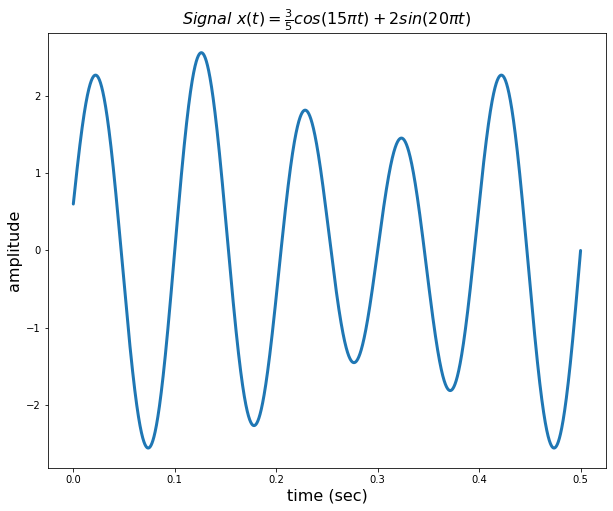

In [3]:
# 1. define the time range `t`, and the signal `x`
# [*] Use `np.arrange(start, finish, 1/fs) or .. `np.linspace(start, finish, # samples)
# N = math.ceil( (t_finish - t_start) / step)
# print("Number of samples for signal x(t), # samples = {}".format(N))
f0 = 8.75
step = 0.00001
t = np.arange(0, 0.5, step)
x = calculate_signal(t)

# 2. visualize signal `x` (time axis)
fig, ax = plt.subplots(figsize = (10,8))
sns.set_style("darkgrid")
ax.set_title(r"Signal $x(t) = \frac{3}{5}cos(15πt) + 2sin(20πt)$", size = 16, style = 'italic')
ax.set_xlabel('time (sec)', fontsize = 16)
ax.set_ylabel('amplitude', fontsize = 16)
ax.plot(t, x, linewidth = 3, label = "signal x(t)")
plt.show()

## 2. Calculate **discrete** signals $x_1[n], x_2[n], x_3[n]$
* In signal processing, sampling is the reduction of a continuous-time signal to a discrete-time signal. A common example is the conversion of a sound wave (a continuous signal) to a sequence of samples (a discrete-time signal).
* We downsample the **signal** $x(t)$ with 3 different sampling frequencies

|**signal**| $x_1[n]$ | $x_2[n]$ | $x_3[n]$|
|:-:|:-:|:-:|:-:|
| $\pmb{f_s}$ | $12.5Hz$ | $50Hz$ | $250Hz$ |

* We will use `np.arange(start, finish, 1 / fs)` once again to construct the new time axis (`t_resampled`) and the new sampled signal `x_resampled`. 



In [4]:
def sampling(fs) :
  t_resampled = np.arange(0,0.5 + 1/fs,1/fs)
  x_resampled = calculate_signal(t_resampled)
  return t_resampled, x_resampled


No handles with labels found to put in legend.


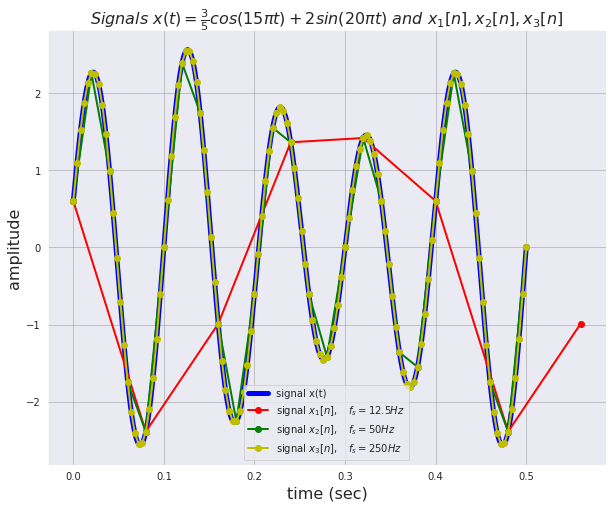

In [5]:
# 1. signals x1[n], x2[n], x3[n] (with the coressponding time axis)
fs1, fs2, fs3 =  12.5, 50, 250
t1, x1 = sampling(fs1)
t2, x2 = sampling(fs2)
t3, x3 = sampling(fs3)


# 3. visualize signal `x(t)`, `x1[n]`, `x2[n]`, `x3[n]` (time axis)
fig, ax = plt.subplots(figsize = (10,8))
sns.set_style("darkgrid")
ax.set_title(r"Signals $x(t) = \frac{3}{5}cos(15πt) + 2sin(20πt)$ and $x_1[n], x_2[n], x_3[n]$", size = 16, style = 'italic')
ax.legend(fancybox = True)
ax.set_xlabel('time (sec)', fontsize = 16)
ax.set_ylabel('amplitude', fontsize = 16)
ax.plot(t, x, 'b', linewidth = 5,label = "signal x(t)")
ax.plot(t1, x1, 'r.-', linewidth = 2, markersize = 12, label = r"signal $x_1[n], \quad f_s = 12.5Hz$" )
ax.plot(t2, x2, 'g.-', linewidth = 2, markersize = 12, label = r"signal $x_2[n], \quad f_s = 50Hz$")
ax.plot(t3, x3, 'y.-', linewidth = 2, markersize = 12, label = r"signal $x_3[n], \quad f_s = 250Hz$")
ax.grid(True, color = 'gray', alpha=0.5)
ax.legend(fancybox=True)
plt.show()

## 3. Reconstruction
### **Sampling Theorem**
A continuous time signal can be represented in its samples and can be recovered back when sampling frequency fs is greater than or equal to the twice the highest frequency component of message signal

$$f_s \geq 2 \cdot f_0 \rightarrow f_s \geq 17.5 Hz$$

So, here we have

| $\pmb{f_s}$ |Reconstruction? |
|:--:|:---:|
| 12.5Hz | NO|
| 50 Hz | YES|
| 250 HZ | YES|

We will able to reconstruct the initial signal (independetly the quality of reconstruction this is another issue not faced here, we need to analyze SNR etc) only by the 2 out 3 sampled signals $x_2[n], x_3[n]$



### **Reconstruction Process**

#### step 1
Let's look at this another way by examing the **Fourier Transform** of a signal that is bandlimited and thus certainly satisfies the hypothesis of the sampling theorem:

$$X(f) = 0, where |f| > W$$

Now, the **inverse Fourier transform** of this is the following:

$$x(t) = \int_{-W}^{W}X(f)e^{j2\pi ft}dt$$


#### step 2
We can take the $X(f)$ and expand it into a Fourier series by pretending that it is periodic with period $2 W$. Thus, we can formally write the following:

$$X(f) = \sum_{k}a_k e^{-j2\pi k f / (2W)}$$

we can compute the coefficients $a_k$ as

$$ a_k = \frac{1}{2W} \int_{-W}^{W}X(f)e^{j2\pi k f / (2W)} df$$

These coefficients bear a striking similarity to the $x(t)$ integral we just computed above. In fact, by lining up terms, we can write:

$$a_k = \frac{1}{2W}x\left(t = \frac{k}{2W}\right)$$

#### step 3
Now, we can write out $X(f)$ in terms of this series and these $a_k$ and then invert the Fourier transform to obtain the following:

$$x(t) = \int_{-W}^{W}\sum_{k}a_k e^{-j2\pi k f / (2W)}e^{j2\pi ft}dt$$

substitute for $a_k$


$$x(t) = \int_{-W}^{W}\sum_{k}\frac{1}{2W}x\left(t = \frac{k}{2W}\right) e^{-j2\pi k f / (2W)}e^{j2\pi ft}dt$$


switch summation and integration :

$$x(t) = \sum_{k}\frac{1}{2W}x\left(t = \frac{k}{2W}\right) \int_{-W}^{W}e^{-j2\pi k f / (2W) + j2\pi ft}dt$$


which gives finally:

$$x(t) = \sum_{k} x\left(t = \frac{k}{2W}\right) \frac{sin(\pi (k - 2tW))}{\pi (k - 2tW)}$$


#### step 4
And this what we have been seeking! A formula that reconstructs the function from its samples. Let's try it!

$$x(t) = \sum_{k} x\left(t = \frac{k}{2W}\right) sinc(\pi (k - 2tW))$$


### **NOTES 📌**
1. Note that since our samples are spaced at $t= \frac{k}{f_s} $ we'll use  $W = \frac{f_s}{2}$ to line things up.
2. The reconstruction process was applied for all 3 signals, the result is that it worked out for signals $x_2[n], x_3[n]$ as expected, since the fulfil the sampling theorem. The reconstructed $x_1(t)$ seems too uncorrelated with the initial signal $x(t)$




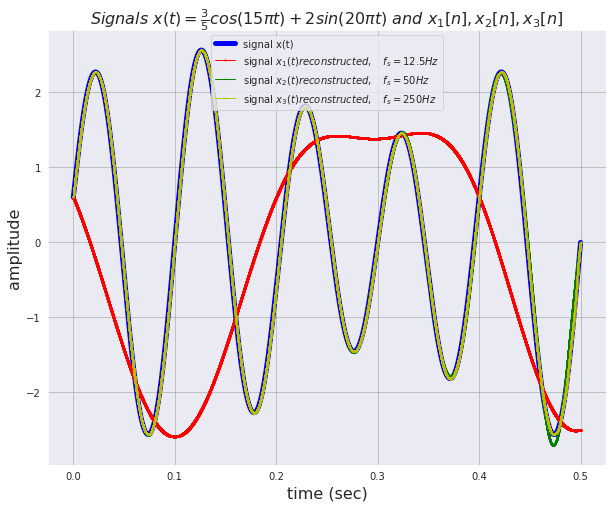

In [6]:
def reconstruct(t, t_sampled, fs):
  num_coeffs = len(t_sampled) # sample points
  x_reconstructed = 0
  for k in range(-num_coeffs, num_coeffs): # since function is real, need both sides
    x_reconstructed += calculate_signal(k/fs) * np.sinc(k - fs * t)

  return x_reconstructed

x1_reconstructed = reconstruct(t, t1, fs1)
x2_reconstructed = reconstruct(t, t2, fs2)
x3_reconstructed = reconstruct(t, t3, fs3)


# 3. visualize signal `x(t)`, `x1[n]`, `x2[n]`, `x3[n]` (time axis)
fig, ax = plt.subplots(figsize = (10,8))
sns.set_style("darkgrid")
ax.set_title(r"Signals $x(t) = \frac{3}{5}cos(15πt) + 2sin(20πt)$ and $x_1[n], x_2[n], x_3[n]$", size = 16, style = 'italic')
ax.set_xlabel('time (sec)', fontsize = 16)
ax.set_ylabel('amplitude', fontsize = 16)
ax.plot(t, x, 'b', linewidth = 5,label = r"signal x(t)")
ax.plot(t, x1_reconstructed, 'r.-', linewidth = 1, markersize = 2, label = r"signal $x_1(t) reconstructed, \quad f_s = 12.5Hz$" )
ax.plot(t, x2_reconstructed, 'g.-', linewidth = 1, markersize = 1, label = r"signal $x_2(t) reconstructed, \quad f_s = 50Hz$")
ax.plot(t, x3_reconstructed, 'y.-', linewidth = 1, markersize = 1, label = r"signal $x_3(t) reconstructed, \quad f_s = 250Hz$")
ax.grid(True, color = 'gray', alpha=0.5)
ax.legend(fancybox=True)
plt.show()


## 4. Amplituide Spectrum
---
<a href="https://ibb.co/sVXRpMn"><img src="https://i.ibb.co/crs3K70/Screen-Shot-2020-12-08-at-22-44-07.png" alt="Screen-Shot-2020-12-08-at-22-44-07" border="0"></a>

#### step 1

So, before we applied a **sinc interpolation** to reconstruct the signals $x_2[n], x_3[n]$. In this section, given these reconstructed signals (we will try for the $x_1(t)$ as well), we need to find its amplitude of spectrum. This means, that we will calculate the **Fourier Tranform** and plot the absolute value for the amplitude (not the phase here)

$$FT : X(f) = \int_{t_{start}}^{t_{finish}}x(t) e^{-2j \pi f t} dt = \int_{0}^{0.5}x(t) e^{-2j \pi f t} dt$$

#### step 2
* **Fourrier Transform (FT)** is continuous in time and frequency, while **Discrete Fourier Transform (DFT)** is discrete in time as well as in frequency. DFT is only an approximation. If you want a good approximation, you'll have to use a high sampling rate for the discretization and you'll have to use a large number of samples, i.e. a large number of frequencies for which you calculate the DFT. As we said before, even the contiguous signals are represented as discrete in simulations like this. 

$$DFT : X[f] = \sum_{n = 0}^{N - 1}x[n]e^{-2j\pi k f n}$$


* So, we will use a **DFT** fast algorithm, called the **Fast Fourier Transform (FFT)**, which was known to Gauss (1805).

#### **NOTES 📌**
* The signal is supposed to come from a real function, so the Fourier transform will be symmetric. The scipy.fftpack.fftfreq() function will generate the sampling frequencies and scipy.fftpack.fft() will compute the fast Fourier transform.
* All signals $x(t), x_1(t), x_2(t), x_3(t)$ have N = 50000 samples. Calculating DFT for so many points is not proper, computationally speaking it costs. So, we will resample for a DFT of N' = 1000 samples. For the resampling we will use `scipy.resample(x, num)` where num = N'
* As expected the signals $x(t), x_2(t), x_3(t)$ have their 2 main frequencies in $f_1 = 7.5Hz$ and $f_2 = 10Hz$ (while there are other weakers, as a result of the superposition). Note here, we used different width for the stem plot, to discern that the DFT is exactly the same for these 3 signals.
* On the other hand, as expected as well, the signal $x_3(t)$ has **different** main frequencies, which is rational when considering that the reconstruction had failed.



In [7]:
def calculate_fft(x, fs):
  ## Calculate DFT (by using the FFT algorithm)
  N = 1000                        # number of DFT samples
  x = signal.resample(x, N)   
  f = fftpack.fftfreq(N) * (2*N)  # Natural frequencies
  X = 1/N * fftpack.fft(x)        # Fourier coefficients (divided by N) #

  return f, X

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection 

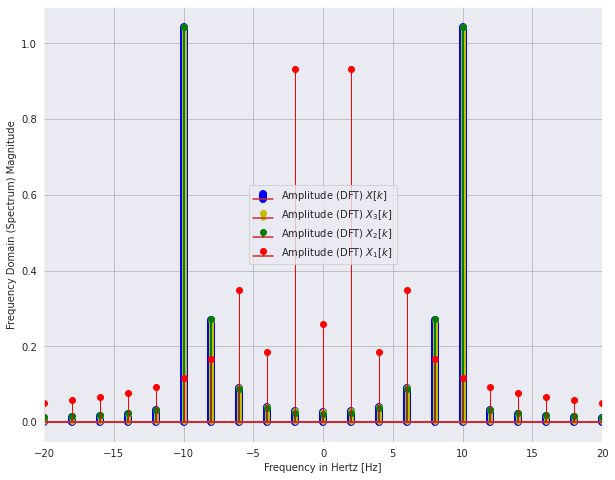

In [8]:
fs = 1000
## 1. Calculate DFT (by using FFT algorithm)
f, X   = calculate_fft(x, fs)
f1, X1 = calculate_fft(x1_reconstructed, fs1)
f2, X2 = calculate_fft(x2_reconstructed, fs2)
f3, X3 = calculate_fft(x3_reconstructed, fs3)

## 2. Visualize
fig, ax = plt.subplots(figsize = (10,8))
_, stems, _  = ax.stem(f, np.abs(X), linefmt = '-b',  markerfmt='bo', label = r"Amplitude (DFT) $X[k] $")
_, stems3, _ = ax.stem(f3, np.abs(X3), linefmt ='-y', markerfmt='yo', label = r"Amplitude (DFT) $X_3[k] $")
_, stems2, _ = ax.stem(f2, np.abs(X2), linefmt = '-g',  markerfmt='go',label = r"Amplitude (DFT) $X_2[k] $")
_, stems1, _ = ax.stem(f1, np.abs(X1), linefmt = '-r', markerfmt='ro', label = r"Amplitude (DFT) $X_1[k] $")
for i in range(len(stems)):
    stems[i].set_linewidth(8)
    stems3[i].set_linewidth(5)
    stems2[i].set_linewidth(2)
    stems1[i].set_linewidth(1)
ax.set_xlabel('Frequency in Hertz [Hz]')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
ax.set_xlim(-20, 20)
ax.grid(True, color = 'gray', alpha = 0.5)
ax.legend(fancybox = True)
plt.show()